## Assignment No.16-Q1

### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
import numpy as np

In [21]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/NN/forestfires.csv')

In [22]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [23]:
df.drop(['month','day'],axis=1,inplace=True)

In [24]:
df.duplicated().sum()

8

In [25]:
df.drop_duplicates()
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [26]:
df.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

LabelEncoding And Data standardization 



In [27]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder=LabelEncoder()
df['size_category']=encoder.fit_transform(df['size_category'])
df.shape

(517, 29)

In [28]:
x = df.drop('size_category', axis = 1)
y = df['size_category']
x.shape

(517, 28)

In [29]:
sc=StandardScaler()
x_=sc.fit_transform(x)
x_

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size=0.30, random_state=42)

**NN Model**

In [31]:
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Dropout

In [32]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=28,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# Fit the model
history=model.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
25/25 [==============================] - 1s 7ms/step - loss: 0.7498 - accuracy: 0.5145 - val_loss: 0.7248 - val_accuracy: 0.5250
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.6307 - val_loss: 0.6701 - val_accuracy: 0.6167
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.6515 - val_loss: 0.6461 - val_accuracy: 0.6500
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6296 - accuracy: 0.6805 - val_loss: 0.6223 - val_accuracy: 0.7250
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.7012 - val_loss: 0.6107 - val_accuracy: 0.7250
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.7054 - val_loss: 0.5996 - val_accuracy: 0.7333
Epoch 7/150
25/25 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.7220 - val_loss: 0.5899 - val_accuracy: 0.7417
Epoch 8/150
2

In [35]:
# evaluate the model
scores = model.evaluate(x_train,y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

12/12 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9695
accuracy: 96.95%


In [36]:
# Visualize training history
# list all data in history
model.history.history.keys()


dict_keys([])

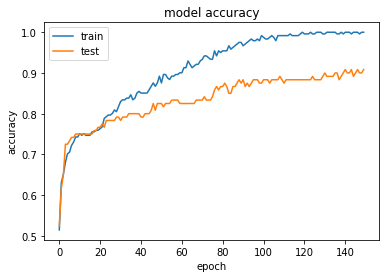

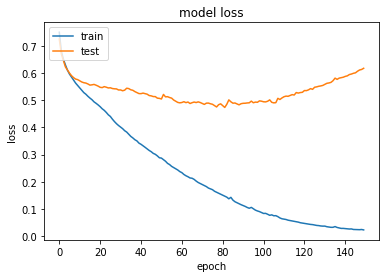

In [37]:
# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()